In [21]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt

In [2]:
iris = load_iris()

In [3]:
dir(iris)

['DESCR',
 'data',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [4]:
df = pd.DataFrame(iris.data , columns=iris.feature_names)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [5]:
df.drop(['sepal length (cm)', 'sepal width (cm)'],axis = 1, inplace = True)

In [6]:
df

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2
...,...,...
145,5.2,2.3
146,5.0,1.9
147,5.2,2.0
148,5.4,2.3


In [8]:
scaler = MinMaxScaler()

In [11]:
scaler.fit(df[['petal length (cm)']])

MinMaxScaler()

In [13]:
df['petal length (cm)'] = scaler.transform(df[['petal length (cm)']])

In [14]:
df

,petal length (cm),petal width (cm)
0,0.067797,0.2
1,0.067797,0.2
2,0.050847,0.2
3,0.084746,0.2
4,0.067797,0.2
...,...,...
145,0.711864,2.3
146,0.677966,1.9
147,0.711864,2.0
148,0.745763,2.3


In [15]:
scaler.fit(df[['petal width (cm)']])
df['petal wwidth (cm)'] = scaler.transform(df[['petal width (cm)']])

In [16]:
df

,petal length (cm),petal width (cm),petal wwidth (cm)
0,0.067797,0.2,0.041667
1,0.067797,0.2,0.041667
2,0.050847,0.2,0.041667
3,0.084746,0.2,0.041667
4,0.067797,0.2,0.041667
...,...,...,...
145,0.711864,2.3,0.916667
146,0.677966,1.9,0.750000
147,0.711864,2.0,0.791667
148,0.745763,2.3,0.916667


In [19]:
k_args = range(1,10)
sse = []
for k in k_args:
    km = KMeans(n_clusters=k)
    km.fit(df[['petal length (cm)','petal wwidth (cm)']])
    sse.append(km.inertia_)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [20]:
sse

[28.36835321972719,
 5.176463590044366,
 1.701874688192097,
 1.1588792731667128,
 0.8538617353912238,
 0.6859546344248155,
 0.5656776810037092,
 0.48648242367753186,
 0.4136372577940613]

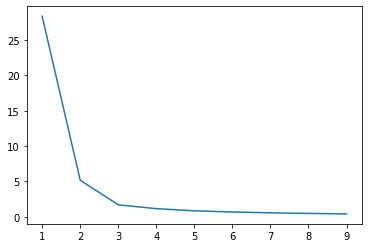

In [23]:
plt.plot(k_args,sse)

In [30]:
Km = KMeans(n_clusters=3)

In [32]:
y_predicted = Km.fit_predict(df[['petal length (cm)','petal wwidth (cm)']])

In [33]:
y_predicted

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [28]:
df['cluster'] = y_predicted

In [29]:
df.head()

,petal length (cm),petal width (cm),petal wwidth (cm),cluster
0,0.067797,0.2,0.041667,0
1,0.067797,0.2,0.041667,0
2,0.050847,0.2,0.041667,0
3,0.084746,0.2,0.041667,0
4,0.067797,0.2,0.041667,0


In [40]:
Km.cluster_centers_

array([[0.07830508, 0.06083333],
       [0.55867014, 0.51041667],
       [0.7740113 , 0.81510417]])

Text(0, 0.5, 'PETAL WIDTH')

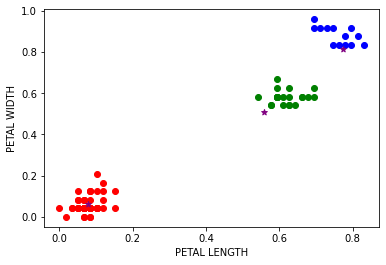

In [45]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]

plt.scatter(df1['petal length (cm)'],df1['petal wwidth (cm)'],color = 'red')
plt.scatter(df2['petal length (cm)'],df2['petal wwidth (cm)'],color = 'green')
plt.scatter(df3['petal length (cm)'],df3['petal wwidth (cm)'],color = 'blue')

plt.scatter(Km.cluster_centers_[:,0],Km.cluster_centers_[:,1],color='purple',marker='*')

plt.xlabel('PETAL LENGTH')
plt.ylabel('PETAL WIDTH')